In [1]:
!pip install -q researchpy

In [2]:
#Import the libraries and packages needed
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns 
import researchpy as rp
from scipy import stats

In [3]:
#Read the csv and create a panads dataframe
df = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

#Drop the columns that will not be used for this project
df.drop(df.iloc[:, 13:25], inplace=True, axis = 1)
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft


In [4]:
#get information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [5]:
#examining missing values
print("Missing values distribution: ")
print(df.isnull().sum())
print("")

Missing values distribution: 
Arrest_Year                          0
Arrest_Month                         0
EventID                              0
ArrestID                           469
PersonID                             0
Perceived_Race                       4
Sex                                  0
Age_group__at_arrest_               24
Youth_at_arrest__under_18_years      0
ArrestLocDiv                         0
StripSearch                          0
Booked                               0
Occurrence_Category                165
dtype: int64



In [6]:
#We can see that 469 ArrestIDs are missing from the dataset.
#For these events with missing ArrestIDs, we assume that arrests were not made.
#drop the rows with missing ArrestIDs
df = df.loc[df["ArrestID"] > 0]
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft


In [7]:
#sort the dataframe by personID
df.sort_values(by='PersonID')

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
16372,2020,July-Sept,1042835,6031555.0,300000,East/Southeast Asian,M,Aged 35 to 44 years,Not a youth,XX,0,0,Vehicle Related (inc. Impaired)
38252,2020,Jan-Mar,1013133,6002148.0,300001,White,F,Aged 17 years and younger,Youth (aged 17 and younger),51,0,1,"FTA/FTC, Compliance Check & Parollee"
55323,2020,Apr-June,1008622,6016704.0,300002,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Assault & Other crimes against persons
55643,2020,July-Sept,1019296,6041043.0,300003,White,M,Aged 25 to 34 years,Not a youth,22,0,1,Other Offence
55645,2021,July-Sept,1023385,6034005.0,300003,White,M,Aged 25 to 34 years,Not a youth,XX,0,1,Drug Related
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40955,2021,Apr-June,1042255,6007649.0,337342,White,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Other Offence
17103,2020,Jan-Mar,1011439,6058391.0,337343,White,M,Aged 35 to 44 years,Not a youth,42,0,1,Assault & Other crimes against persons
35894,2020,Jan-Mar,1042769,6033308.0,337344,Black,M,Aged 18 to 24 years,Not a youth,22,1,1,Weapons & Homicide
60727,2021,Jan-Mar,1054317,6019003.0,337345,Black,M,Aged 65 years and older,Not a youth,XX,0,0,Police Category - Incident


In [8]:
#dropping rows where sex=u (unidentified)
df = df.loc[df["Sex"] != 'U']
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft


In [9]:
#By counting the number of times a PersonID appears, we can also count the number of times a person has been arrested.
df['PersonID'].value_counts()

327486    54
331300    46
310375    41
303892    39
330299    35
          ..
309949     1
325498     1
318570     1
324886     1
310583     1
Name: PersonID, Length: 37326, dtype: int64

# EDA

In [10]:
NumofArrests = df['PersonID'].value_counts()

In [11]:
NumofArrests.head()

327486    54
331300    46
310375    41
303892    39
330299    35
Name: PersonID, dtype: int64

In [12]:
NumofArrests.tail()

309949    1
325498    1
318570    1
324886    1
310583    1
Name: PersonID, dtype: int64

In [13]:
#View the descriptive statistics for the number of arrests
NumofArrests.describe()

count    37326.000000
mean         1.736002
std          2.012477
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         54.000000
Name: PersonID, dtype: float64

This shows that 37329 different people have been arrested. The maximum number of arrests that a person has is 54 times, and the minimum number of arrests that a person has is 1. This makes sense because every person in this pandas series has been arrested at least once. The average number of times a person gets arrested is 1.74. The huge difference between the maximum of 54 and the 75th percentile of 2 suggest that there are extreme outliers.

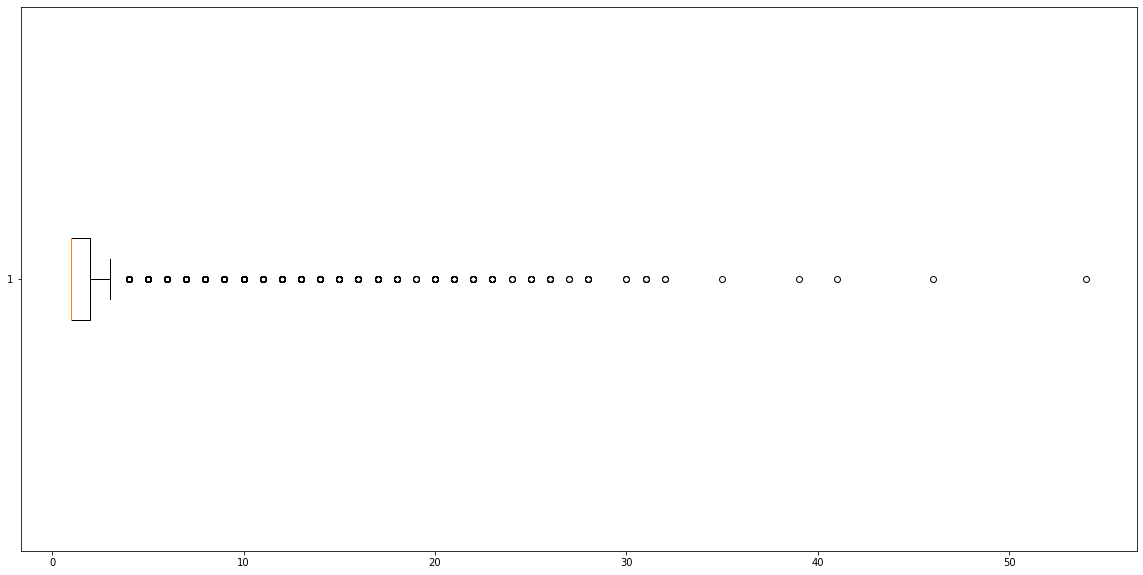

In [14]:
#create a boxplot for the number of arrests
plt.figure(figsize= (20,10))
plt.boxplot(NumofArrests, vert=False)
 
# show plot
plt.show()

From the boxplot, we can also see that there are some extreme outliers. 

In [15]:
#remove the outliers from NumofArrests
validNumofArrests = NumofArrests[NumofArrests < 30]
print(validNumofArrests)

335617    28
318274    28
329126    28
325445    28
321623    27
          ..
309949     1
325498     1
318570     1
324886     1
310583     1
Name: PersonID, Length: 37314, dtype: int64


In [16]:
validNumofArrests.describe()

count    37314.000000
mean         1.724983
std          1.912217
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         28.000000
Name: PersonID, dtype: float64

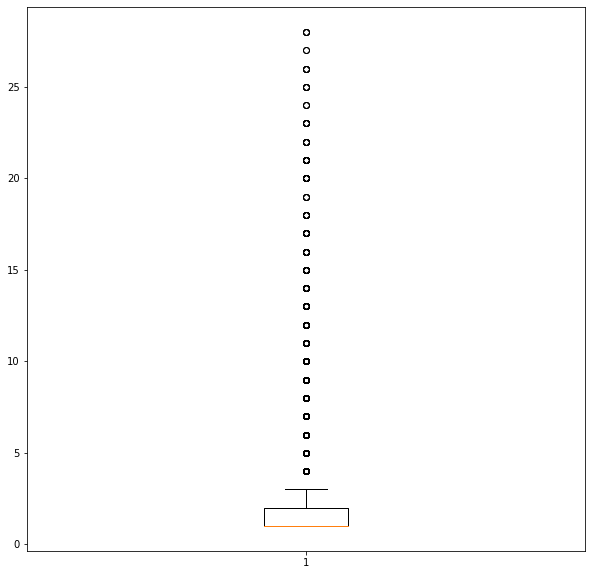

In [17]:
#create a boxplot for the number of arrests after the outliers have been taken out
plt.figure(figsize= (10,10))
plt.boxplot(validNumofArrests)
 
# show plot
plt.show()

In [18]:
#Add number of arrests as a column back to the dataframe
df['Number_of_Arrests'] = df.groupby('PersonID')['PersonID'].transform('count')
df

<ipython-input-18-695a38ea2c3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Arrests'] = df.groupby('PersonID')['PersonID'].transform('count')


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Arrests
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,1
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,1
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,1
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,1


In [19]:
#remove the outliers from the dataframe
df_valid = df[df['Number_of_Arrests'] < 30]
df_valid

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Arrests
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,1
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,1
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,1
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,1


In [20]:
#sort the dataframe by the number of arrests
df_valid.sort_values(by='Number_of_Arrests', inplace=True)
df_valid

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Arrests
65275,2021,Oct-Dec,1033395,6032145.0,310583,Latino,M,Aged 18 to 24 years,Not a youth,XX,0,0,Mischief,1
23968,2021,Oct-Dec,1019317,6041878.0,308073,Black,M,Aged 18 to 24 years,Not a youth,XX,0,0,Police Category - Administrative,1
23967,2020,Apr-June,1029401,6029291.0,310204,Black,F,Aged 25 to 34 years,Not a youth,51,1,1,Assault & Other crimes against persons,1
23966,2020,July-Sept,1054161,6043254.0,325668,East/Southeast Asian,M,Aged 45 to 54 years,Not a youth,XX,0,0,Other Statute & Other Incident Type,1
23965,2021,July-Sept,1000379,6003625.0,315646,East/Southeast Asian,M,Aged 35 to 44 years,Not a youth,51,0,1,Drug Related,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47561,2020,Oct-Dec,1044099,6038951.0,325445,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Other Statute & Other Incident Type,28
47560,2020,Oct-Dec,1049964,6007606.0,325445,White,M,Aged 35 to 44 years,Not a youth,14,0,1,Other Statute & Other Incident Type,28
47559,2020,Oct-Dec,1051745,6053728.0,325445,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Other Statute & Other Incident Type,28
47565,2020,Oct-Dec,1007070,6000402.0,325445,White,M,Aged 35 to 44 years,Not a youth,14,0,1,"FTA/FTC, Compliance Check & Parollee",28


In [21]:
# Exploring number of arrests based on different categories
num_typeOfArrest= df_valid.groupby('Occurrence_Category')['ArrestID'].nunique().to_frame
print(num_typeOfArrest)


<bound method Series.to_frame of Occurrence_Category
Assault                                            7680
Assault & Other crimes against persons             7148
Break & Enter                                       845
Break and Enter                                     863
Crimes against Children                              69
Drug Related                                       2727
FTA/FTC, Compliance Check & Parollee               3699
FTA/FTC/Compliance Check/Parollee                  4215
Fraud                                               473
Harassment & Threatening                           1246
Harassment/Threatening                             1342
Homicide                                             72
Impaired                                           1362
LLA                                                 567
Mental Health                                       237
Mischief                                           1308
Mischief & Fraud                                   

In [22]:
# Number of arrests grouped by percieved race
num_typeOfrace= df_valid.groupby('Perceived_Race')['ArrestID'].nunique().to_frame
print(num_typeOfrace)

<bound method Series.to_frame of Perceived_Race
Black                   17215
East/Southeast Asian     4388
Indigenous               1826
Latino                   1755
Middle-Eastern           3211
South Asian              3601
Unknown or Legacy        4987
White                   27378
Name: ArrestID, dtype: int64>


In [23]:
# Number of arrests grouped by age
num_typeOfrace= df_valid.groupby('Youth_at_arrest__under_18_years')['ArrestID'].nunique().to_frame
print(num_typeOfrace)

<bound method Series.to_frame of Youth_at_arrest__under_18_years
Not a youth                        61341
Youth (aged 17 and younger)         1663
Youth (aged 17 years and under)     1360
Name: ArrestID, dtype: int64>


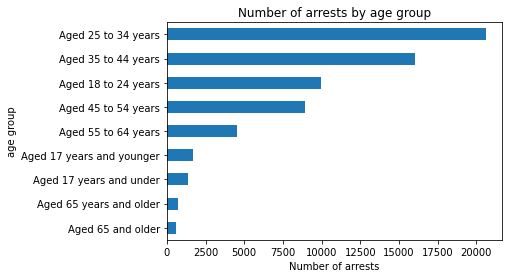

In [24]:
df_valid.groupby([df_valid['Age_group__at_arrest_']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of arrests by age group')
plt.ylabel('age group')
plt.xlabel('Number of arrests')
plt.show()

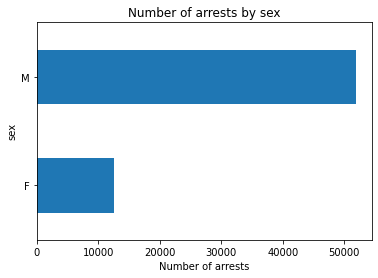

In [25]:
df_valid.groupby([df_valid['Sex']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of arrests by sex')
plt.ylabel('sex')
plt.xlabel('Number of arrests')
plt.show()

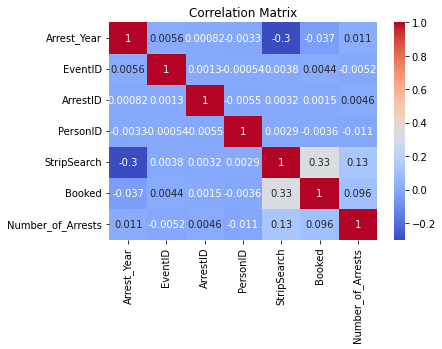

In [26]:
# Calculate the correlation matrix
corr_matrix = df_valid.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# T-tests
1st T-test: 
Research question for the 1st t-test: Is there a difference in the number of arrests between genders?
Independent variable: sex (male or female) of a person;
Dependent variable: number of arrests of that person.

In [27]:
#drop the columns not needed for t-test #1
df_ttest1 = df_valid[['PersonID', 'Sex', 'Number_of_Arrests']]
df_ttest1.sort_values(by='Number_of_Arrests', inplace=True)
df_ttest1

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,PersonID,Sex,Number_of_Arrests
65275,310583,M,1
9605,313941,M,1
9606,326834,M,1
9607,327999,M,1
60024,337021,F,1
...,...,...,...
32573,318274,M,28
32572,318274,M,28
32571,318274,M,28
27400,329126,M,28


In [28]:
#display the number of samples in each sex group
group_m = df_ttest1[df_ttest1['Sex'] == 'M']['Number_of_Arrests']
group_f = df_ttest1[df_ttest1['Sex'] == 'F']['Number_of_Arrests']
print(group_m. count())
print(group_f.count())

51857
12509


In [29]:
#to ensure the accuracy of the t-test, we need to make sure the sample groups have the same size
#to do this, we randomly select 10000 samples from each group
ttest_m = group_m.sample(n = 10000)
ttest_f = group_f.sample(n = 10000)

In [30]:
print(ttest_m. describe())
print(ttest_f.describe())

count    10000.000000
mean         3.861300
std          4.480298
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         28.000000
Name: Number_of_Arrests, dtype: float64
count    10000.000000
mean         3.772200
std          4.693624
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         27.000000
Name: Number_of_Arrests, dtype: float64


In [31]:
#conduct the 1st t-test
rp.ttest(group1= ttest_m, group1_name= "Male",
         group2= ttest_f, group2_name= "Female")

(   Variable        N     Mean        SD        SE  95% Conf.  Interval
 0      Male  10000.0  3.86130  4.480298  0.044803   3.773477  3.949123
 1    Female  10000.0  3.77220  4.693624  0.046936   3.680196  3.864204
 2  combined  20000.0  3.81675  4.588303  0.032444   3.753157  3.880343,
               Independent t-test     results
 0  Difference (Male - Female) =       0.0891
 1          Degrees of freedom =   19998.0000
 2                           t =       1.3732
 3       Two side test p value =       0.1697
 4      Difference < 0 p value =       0.9151
 5      Difference > 0 p value =       0.0849
 6                   Cohen's d =       0.0194
 7                   Hedge's g =       0.0194
 8              Glass's delta1 =       0.0199
 9            Point-Biserial r =       0.0097)

Interpretation for the 1st t-test: An independent samples t-test was run to determine if there were differences in the number of arrests between males and females. The mean number of arrests of males (M = 3.83, SD = 4.50) was not significantly different from that of females (M = 3.81, SD = 4.73), t(19998) = 0.28, p = 0.78 > 0.05.

Research question for the 2nd t-test: Is there a difference in the number of arrests between youths and non-youths? Independent variable: youth or non-youth. Dependent variable: number of arrests.

In [32]:
#drop the columns not needed for t-test #2
df_ttest2 = df_valid[['PersonID', 'Youth_at_arrest__under_18_years', 'Number_of_Arrests']]
df_ttest2

,PersonID,Youth_at_arrest__under_18_years,Number_of_Arrests
65275,310583,Not a youth,1
23968,308073,Not a youth,1
23967,310204,Not a youth,1
23966,325668,Not a youth,1
23965,315646,Not a youth,1
...,...,...,...
47561,325445,Not a youth,28
47560,325445,Not a youth,28
47559,325445,Not a youth,28
47565,325445,Not a youth,28


In [33]:
#display the number of samples in the youth group and the non-youth group
group_y = df_ttest2[df_ttest2['Youth_at_arrest__under_18_years'] != 'Not a youth']['Number_of_Arrests']
group_noty = df_ttest2[df_ttest2['Youth_at_arrest__under_18_years'] == 'Not a youth']['Number_of_Arrests']
print(group_m. count())
print(group_f.count())

51857
12509


In [34]:
#to ensure the accuracy of the t-test, we need to make sure the sample groups have the same size
#to do this, we randomly select 10000 samples from each group
ttest_y = group_y.sample(n = 10000, replace=True)
ttest_noty = group_noty.sample(n = 10000, replace=True)
print(ttest_y. describe())
print(ttest_noty.describe())

count    10000.000000
mean         2.600400
std          3.011117
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         21.000000
Name: Number_of_Arrests, dtype: float64
count    10000.000000
mean         3.913400
std          4.655842
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         28.000000
Name: Number_of_Arrests, dtype: float64


In [36]:
#conduct the 2nd t-test
rp.ttest(group1= ttest_noty, group1_name= "Not a Youth",
         group2= ttest_y, group2_name= "Youth")

(      Variable        N    Mean        SD        SE  95% Conf.  Interval
 0  Not a Youth  10000.0  3.9134  4.655842  0.046558   3.822136  4.004664
 1        Youth  10000.0  2.6004  3.011117  0.030111   2.541376  2.659424
 2     combined  20000.0  3.2569  3.975185  0.028109   3.201804  3.311996,
                     Independent t-test     results
 0  Difference (Not a Youth - Youth) =       1.3130
 1                Degrees of freedom =   19998.0000
 2                                 t =      23.6803
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       1.0000
 5            Difference > 0 p value =       0.0000
 6                         Cohen's d =       0.3349
 7                         Hedge's g =       0.3349
 8                    Glass's delta1 =       0.2820
 9                  Point-Biserial r =       0.1652)

Interpretation for the 2nd t-test: An independent samples t-test was run to determine if there were differences in the number of arrests between non-youths and youths. The number of arrests of non-youths (M = 3.91, SD = 4.66) was higher than that of youths (M = 2.60, SD = 3.01), a statistically significant difference, t(19998) = 23.68, p = 0.00 < 0.05.

# ANOVA


One-way ANOVA #1: For the first one-way ANOVA, the research question is as follows: Is there a difference in the number of arrests based on the person’s perceived race (White, Black, or Latino)? (RQa1) 

In [37]:
#creating dataset with selected race and age
#applying race filters
df_race_age = df_valid[['PersonID', 'Age_group__at_arrest_', 'Perceived_Race', 'Number_of_Arrests']]
df_race_age = df_race_age.loc[(df_race_age['Perceived_Race'] == 'Black') | (df_race_age['Perceived_Race'] == 'White') |  (df_race_age['Perceived_Race'] == 'Latino')]
#applying age filters
df_race_age = df_race_age.loc[(df_race_age['Age_group__at_arrest_'] == 'Aged 35 to 44 years') | (df_race_age['Age_group__at_arrest_'] == 'Aged 25 to 34 years') |  (df_race_age['Age_group__at_arrest_'] == 'Aged 18 to 24 years')]
df_race_age

,PersonID,Age_group__at_arrest_,Perceived_Race,Number_of_Arrests
65275,310583,Aged 18 to 24 years,Latino,1
23968,308073,Aged 18 to 24 years,Black,1
23967,310204,Aged 25 to 34 years,Black,1
23960,327384,Aged 35 to 44 years,White,1
23956,321994,Aged 25 to 34 years,White,1
...,...,...,...,...
47562,325445,Aged 35 to 44 years,White,28
47561,325445,Aged 35 to 44 years,White,28
47560,325445,Aged 35 to 44 years,White,28
47559,325445,Aged 35 to 44 years,White,28


In [38]:
#create dataframes for the racial groups that will be investigated in the 1st one-way ANOVA
arrests_w = df_race_age[df_race_age['Perceived_Race'] == 'White']['Number_of_Arrests']
arrests_b = df_race_age[df_race_age['Perceived_Race'] == 'Black']['Number_of_Arrests']
arrests_l = df_race_age[df_race_age['Perceived_Race'] == 'Latino']['Number_of_Arrests']

In [39]:
#check the descriptive stats for each racial group
print(arrests_w.describe())
print(arrests_b.describe())
print(arrests_l.describe())

count    18485.000000
mean         4.894671
std          5.265274
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         28.000000
Name: Number_of_Arrests, dtype: float64
count    13494.000000
mean         3.741959
std          4.242269
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         28.000000
Name: Number_of_Arrests, dtype: float64
count    1375.000000
mean        3.218909
std         3.939416
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        25.000000
Name: Number_of_Arrests, dtype: float64


In [40]:
#we can see that the sample size for each racial group is not equal.
#For a balanced design, we need to make sure the sample sizes for each group are equal.
#Thus, we need to select 1000 random samples from each group.
arrests_w_anova = arrests_w.sample(n = 1000)
arrests_b_anova = arrests_b.sample(n = 1000)
arrests_l_anova = arrests_l.sample(n = 1000)

In [41]:
#check the descriptive stats for each racial group after 1000 random samples were taken from each group.
print(arrests_w_anova.describe())
print(arrests_b_anova.describe())
print(arrests_l_anova.describe())

count    1000.000000
mean        5.108000
std         5.485657
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        28.000000
Name: Number_of_Arrests, dtype: float64
count    1000.000000
mean        3.595000
std         3.963166
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        28.000000
Name: Number_of_Arrests, dtype: float64
count    1000.00000
mean        3.24200
std         3.91136
min         1.00000
25%         1.00000
50%         2.00000
75%         4.00000
max        23.00000
Name: Number_of_Arrests, dtype: float64


In [42]:
from scipy.stats import f_oneway

# One-way ANOVA for arrests grouped by race
statistic, pvalue = f_oneway(arrests_w_anova, arrests_b_anova, arrests_l_anova)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 48.248297587025725, p = 2.3784566259667644e-21


In [43]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

The p-value is <0.001 (***)


From the results of the first one-way ANOVA, we can see that the p value is much smaller than 0.05.Therefore, we can reject the null hypothesis. We can conclude that there are significant differences in the means of the number of arrests of people from different perceived races.

One-way ANOVA #2: For the second one-way ANOVA, the research question is as follows: Is a difference in the number of arrests based on the person’s age group? (RQa2)

In [44]:
#create dataframes for the age groups that will be investigated in the 1st one-way ANOVA
age_35_44 = df_race_age[df_race_age['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['Number_of_Arrests']
age_25_34 = df_race_age[df_race_age['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['Number_of_Arrests']
age_18_24 = df_race_age[df_race_age['Age_group__at_arrest_'] == 'Aged 18 to 24 years']['Number_of_Arrests']

In [45]:
#check the descriptive stats for each racial group
print(age_35_44.describe())
print(age_25_34.describe())
print(age_18_24.describe())

count    11701.000000
mean         4.694727
std          4.951936
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         28.000000
Name: Number_of_Arrests, dtype: float64
count    14986.000000
mean         4.602829
std          5.080704
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         28.000000
Name: Number_of_Arrests, dtype: float64
count    6667.000000
mean        3.222889
std         3.955247
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        26.000000
Name: Number_of_Arrests, dtype: float64


In [46]:
#we can see that the sample size for each racial group is not equal.
#For a balanced design, we need to make sure the sample sizes for each group are equal.
#Thus, we need to select 5000 random samples from each group.
age_35_44_anova = age_35_44.sample(n = 5000)
age_25_34_anova = age_25_34.sample(n = 5000)
age_18_24_anova = age_18_24.sample(n = 5000)

In [47]:
#check the descriptive stats for each racial group after 5000 random samples were taken from each group.
print(age_35_44_anova.describe())
print(age_25_34_anova.describe())
print(age_18_24_anova.describe())

count    5000.000000
mean        4.678600
std         4.906457
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        28.000000
Name: Number_of_Arrests, dtype: float64
count    5000.000000
mean        4.602600
std         5.076005
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        28.000000
Name: Number_of_Arrests, dtype: float64
count    5000.000000
mean        3.259600
std         3.974942
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        26.000000
Name: Number_of_Arrests, dtype: float64


In [48]:
# One-way ANOVA for arrests grouped by age group

statistic, pvalue = f_oneway(age_35_44_anova, age_25_34_anova, age_18_24_anova)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')


One-way ANOVA: s = 145.60580933874067, p = 2.345971309369173e-63


In [49]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

The p-value is <0.001 (***)


From the results of the second one-way ANOVA, we can see that the p value is much smaller than 0.05. Therefore, we can reject the null hypothesis. We can conclude that there are significant differences in the means of the number of arrests of people from different age groups.

In [57]:
from scipy.stats import f
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison



# 2 way anova
model = ols('Number_of_Arrests ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)', data=df_race_age).fit()
sm.stats.anova_lm(model, typ=2)




,sum_sq,df,F,PR(>F)
C(Perceived_Race),9103.933969,2.0,197.753402,4.189182e-86
C(Age_group__at_arrest_),7690.078205,2.0,167.041977,6.540313e-73
C(Perceived_Race):C(Age_group__at_arrest_),1349.898219,4.0,14.661078,5.724755e-12
Residual,767548.559662,33345.0,NaN,NaN


From the results of the two-way ANOVA, we can see that the p-value for both perceived race and age group at arrest is much smaller than 0.05. Thus, we can reject the null hypotheses in both set 1 and set 2 and conclude that there are significant differences in the means of the number of arrests of people from different age groups or different perceived races. The p-value for the interaction effect is also smaller than 0.05. Thus, we reject the null hypothesis in set 3 and conclude that there is significant interaction effect between perceived race and age group.

# Post-hoc Test

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [51]:
#Tukey test for one-way anova #1
tukey1 = pairwise_tukeyhsd( df_race_age['Number_of_Arrests'],df_race_age['Perceived_Race'],  alpha=0.05)
print(tukey1.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Black Latino  -0.5231 0.001 -0.8432 -0.2029   True
 Black  White   1.1527 0.001  1.0247  1.2808   True
Latino  White   1.6758 0.001  1.3596  1.9919   True
---------------------------------------------------


Tukey test for one-way anova #1 interpretation:
From the results of the Tukey’s test, we observe that


*   P-value for the difference in means between Black and Latino: 0.001
*   P-value for the difference in means between Black and White: 0.001
*   P-value for the difference in means between Latino and White: 0.001

Thus, we would conclude that there is a statistically significant difference between the means of arrest numbers of Black persons and Latino persons, between the means of arrest numbers of Black persons and white persons, and between the means of arrest numbers of Latino persons and White persons.

In [55]:
#Tukey test for one-way anova #2
tukey2 = pairwise_tukeyhsd( df_race_age['Number_of_Arrests'],df_race_age['Age_group__at_arrest_'],  alpha=0.05)
print(tukey2.summary())

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
Aged 18 to 24 years Aged 25 to 34 years   1.3799  0.001  1.2133 1.5466   True
Aged 18 to 24 years Aged 35 to 44 years   1.4718  0.001  1.2981 1.6455   True
Aged 25 to 34 years Aged 35 to 44 years   0.0919 0.2716 -0.0478 0.2316  False
-----------------------------------------------------------------------------


Tukey test for one-way anova #2 interpretation: From the results of the Tukey’s test, we observe that


*   P-value for the difference in means between age group 18 to 24 years and age group 25 to 34 years: 0.001
*   P-value for the difference in means between age group 18 to 24 years and age group 35 to 44 years: 0.001

*   P-value for the difference in means between age group 25 to 34 years and age group 35 to 44 years: 0.272






Thus, we would conclude that there is a statistically significant difference between the means of arrest numbers of persons aged 18 to 24 and persons aged 25 to 34, between the means of arrest numbers of persons aged 18 to 24 and persons aged 35 to 44, but not a statistically significant difference between the means of arrest numbers of persons aged 25 to 34 and persons aged 35 to 44.


In [58]:
#tukey test for 2 way anova
mc = MultiComparison(df_race_age['Number_of_Arrests'], df_race_age['Age_group__at_arrest_'].astype(str) + ',' +  df_race_age['Perceived_Race'].astype(str))
tukey_anova2way = mc.tukeyhsd()
print(tukey_anova2way)


                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------
 Aged 18 to 24 years,Black Aged 18 to 24 years,Latino   0.5119 0.6618  -0.373  1.3967  False
 Aged 18 to 24 years,Black  Aged 18 to 24 years,White   0.5218  0.001  0.1426   0.901   True
 Aged 18 to 24 years,Black  Aged 25 to 34 years,Black   1.1533  0.001  0.8452  1.4615   True
 Aged 18 to 24 years,Black Aged 25 to 34 years,Latino  -0.0236    0.9  -0.668  0.6208  False
 Aged 18 to 24 years,Black  Aged 25 to 34 years,White    2.076  0.001  1.7824  2.3696   True
 Aged 18 to 24 years,Black  Aged 35 to 44 years,Black   0.8281  0.001  0.4799  1.1763   True
 Aged 18 to 24 years,Black Aged 35 to 44 years,Latino   0.3722 0.8099 -0.3725   1.117  False
 Aged 18 to 24 years,Black  Aged 35 to 44 years,White   2.1817  0.001 

Interpretation for Tukey test for two-way ANOVA: In the write-up

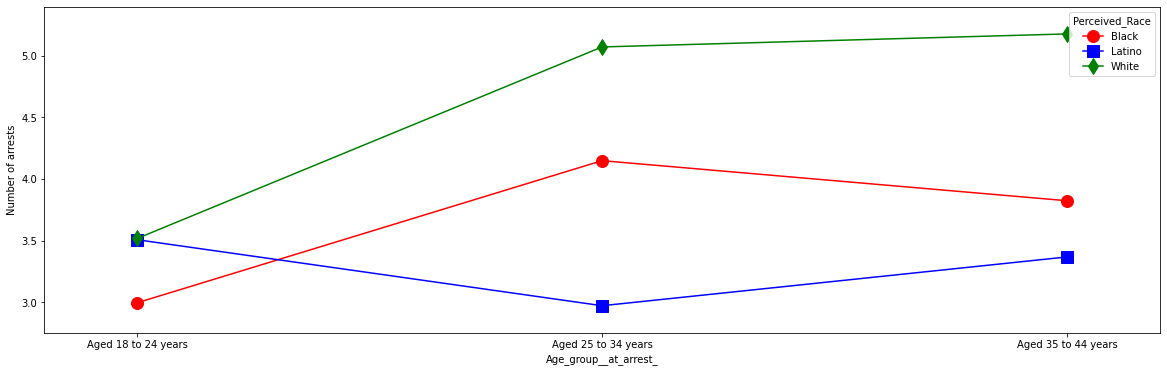

In [59]:
#Interaction plot

from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(20, 6))
Race = df_race_age['Perceived_Race'].astype("category")
arrests = df_race_age['Number_of_Arrests'].values

sex_race_interact_arrests = interaction_plot(df_race_age['Age_group__at_arrest_'], Race, arrests, colors=['red','blue','green'], markers=['o','s','d'], ms=12,ax=ax)

plt.ylabel('Number of arrests')

plt.show()